# Project 1: Michael Kim and Drew Mendinueto (1)


# Question 1

In [236]:
# Load the dataset
from sklearn.datasets import fetch_20newsgroups

# To create more consistency:
import numpy as np 
np.random.seed(42) 
import random 
random.seed(42)
import matplotlib.pyplot as plt

Loading the Dataset

In [237]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
sum = []

for i in categories:
    train_dataset = fetch_20newsgroups(subset = 'train', categories = [i], shuffle = True, random_state = None)
    # test_dataset = fetch_20newsgroups(subset = 'test', categories = [i], shuffle = True, random_state = None)
    sum.append(len(train_dataset.target))
    
# print(train_dataset.data[0][1])

In [238]:
dictionary = {key: value for key, value in zip(categories, sum)}

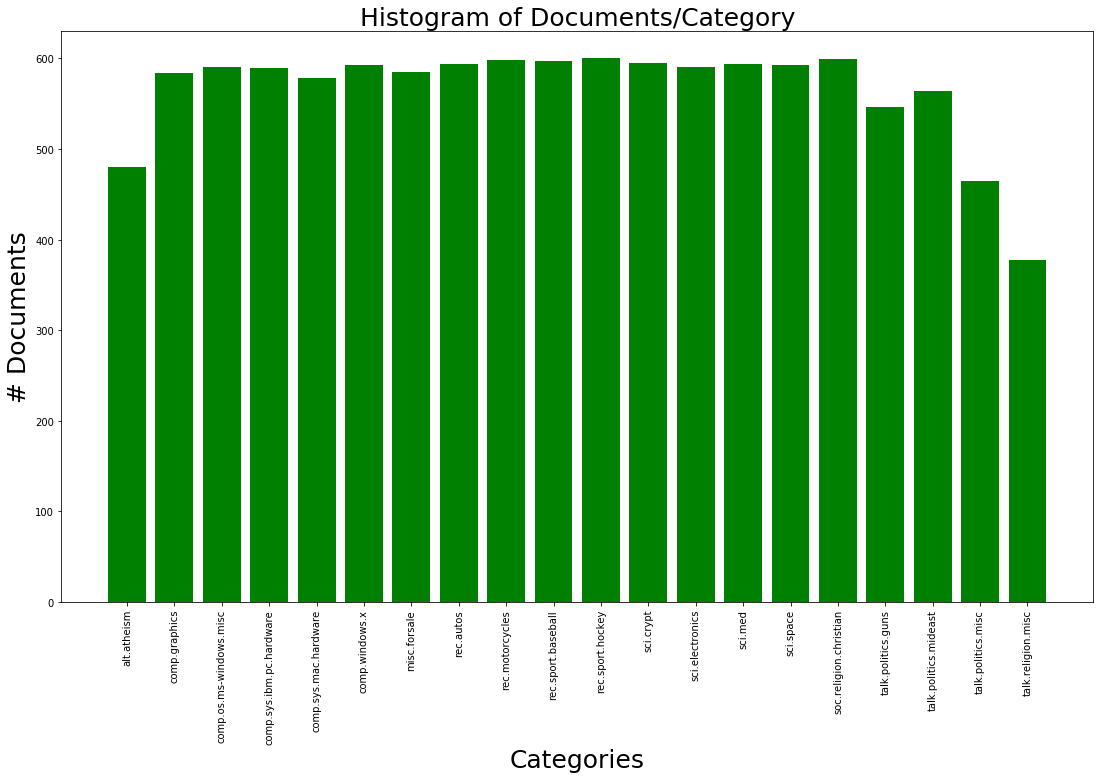

In [239]:
plt.bar(list(dictionary.keys()), dictionary.values(), color='g')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.title('Histogram of Documents/Category', fontsize = 25)
plt.xlabel('Categories', fontsize = 25)
plt.ylabel('# Documents', fontsize = 25)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)
plt.show()

fig.savefig('test3png.png', dpi=100)

Based upon the histogram of the 20 categories, the number of training documents seem to be relatively evenly distributed across all 20 categories.

# Question 2

CountVectorizer allows us to tokenize a collection of text documents and build a vocabulary of known words

### 1) Use 'english' stopwords
Stopwords help us to ignore unneccessary words that might take away from the analysis of the document

In [7]:
from string import punctuation
from sklearn.feature_extraction import text
import re
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sn
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer
import operator
import numpy as np 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
# Load the dataset
from sklearn.datasets import fetch_20newsgroups
# To create more consistency:
import numpy as np 
np.random.seed(42) 
import random 
random.seed(42)
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from string import punctuation
from sklearn.feature_extraction import text
import re
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
from sklearn.feature_extraction.text import CountVectorizer
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, 
                                   random_state = None, 
                                   remove = ('headers', 'footers'))
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None, 
                                  remove = ('headers', 'footers'))


analyzer = CountVectorizer().build_analyzer()
stop_words_en = stopwords.words('english')
stop_words_skt = text.ENGLISH_STOP_WORDS
combined_stopwords = set.union(set(stop_words_en),set(punctuation), set(stop_words_skt))
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords
            and not word.isdigit())

def stem_rmv_puncNoLem(docIn):
    bagWords = []
    doc = re.findall(r"[\w']+|[.,!?;]", docIn)
    for word in lemmatize_sent(doc):
        if word not in combined_stopwords and not word.isdigit():
            bagWords.append(word)
    # print(len(bagWords))
    return ' '.join(word for word in bagWords)

### 2) Exclude terms that are numbers

In [8]:
corpus = [
...     'This is the first document.',
...     'This document is the second second second document.',
...     'And this is the third one.',
...     'Is this the first document?',
...     '123 123 1 2 3']

c2 = 'Hello Hi will chinese, ok'
words = re.findall(r"[\w']+|[.,!?;]", c2)


# print(words)

### 3) Perform lemmatization
Trying to find the root word with linguistics rules (with the use of regexes). For example, tenses matter.

### CountVectorizer Model

In [9]:
"""
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer2 = TfidfTransformer()

reducedTextTrain = []
for x in train_dataset.data:
    reducedTextTrain.append(stem_rmv_punc(x))
    
    
reducedTextTest = []
for x in test_dataset.data:
    reducedTextTest.append(stem_rmv_punc(x))
"""

'\nfrom sklearn.feature_extraction.text import TfidfTransformer\ntfidf_transformer = TfidfTransformer()\ntfidf_transformer2 = TfidfTransformer()\n\nreducedTextTrain = []\nfor x in train_dataset.data:\n    reducedTextTrain.append(stem_rmv_punc(x))\n    \n    \nreducedTextTest = []\nfor x in test_dataset.data:\n    reducedTextTest.append(stem_rmv_punc(x))\n'

In [11]:
vectorizerTrain = CountVectorizer(min_df=3, analyzer = stem_rmv_punc, stop_words=combined_stopwords)
tfidf_transformer = TfidfTransformer()

Xtrain = vectorizerTrain.fit_transform(train_dataset.data)
# CountVectorizer is used to tokenize the text: express words as an array
X_new_tfid_train = tfidf_transformer.fit_transform(Xtrain)
print('The shape of the training dataset:')
print(X_new_tfid_train.shape)

# vectorizerTest = CountVectorizer(min_df=3, stop_words=combined_stopwords, analyzer = stem_rmv_punc)

Xtest = vectorizerTrain.transform(test_dataset.data)
# CountVectorizer is used to tokenize the text: express words as an array
X_new_tfid_test = tfidf_transformer.transform(Xtest)
print('The shape of the testing dataset:')
print(X_new_tfid_test.shape)

# vectorizerTrain.vocabulary_

The shape of the training dataset:
(4732, 13620)
The shape of the testing dataset:
(3150, 13620)


In [13]:
# print(reducedTextTrain[0])
print("\n")
print(train_dataset.data[0])

check = X_new_tfid_test.toarray()
print(np.sum(check))



In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) writes:
|> 
|> 
|> The media is beating the incident at Dodger Stadium on Wednesday to
|> death, but I haven't seen anything in rsb yet.
|> 
|> Gerald Perry of the Cardinals pinch hit in the eighth inning with two
|> on and his club down by a run.  He stroked a line drive into the
|> right field corner.  The ball cleared the three-foot high fence and
|> went into the crowd.  Darryl, racing over from right center, got to
|> the spot in time to reach his glove up over the short fence, but he
|> missed the ball.  A fan sitting in the front row, wearing a mitt,
|> reached up and caught the ball.  Home run.
|> 
|> Now I've seen the replay several times and I have concluded that
|> Darryl missed the ball, and that the fan's glove was essentially
|> behind Darryl's.  Several Dodger fans with seats in the immediate
|> vicinity have claimed that the fan unquestionably interfered with
|> Strawberry.  What cannot be disputed, h

# Question 3

In [14]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

# TruncatedSVD = LSA/LSI

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_new_tfid_train)

# Function returns Xnew, the transformed data
print(X_train_reduced.shape)

nmf = NMF(n_components=50, random_state=0)
X_train_reduced_NMF = nmf.fit_transform(X_new_tfid_train)

# Function returns W, the transformed data
print(X_train_reduced_NMF.shape)

(4732, 50)
(4732, 50)


### Now compare the error between X_train vs NMF and SVD models

In [246]:
import operator
import numpy as np 

# Now we revert the transformed data to see the error associated with its condensed form

X_NMF_reverted = nmf.inverse_transform(X_train_reduced_NMF)
X_LSI_reverted = svd.inverse_transform(X_train_reduced)


In [247]:
map_object_NMF = map(operator.sub, X_new_tfid_train, X_NMF_reverted)
subtracted_list_NMF = list(map_object_NMF)
# print(len(subtracted_list_NMF))

map_object_LSI = map(operator.sub, X_new_tfid_train, X_LSI_reverted)
subtracted_list_LSI = list(map_object_LSI)

LSIError= np.square(subtracted_list_LSI)
LSIError = np.sum(LSIError)**(1/2)

NMFError = np.square(subtracted_list_NMF)
NMFError = np.sum(NMFError)**(1/2)

print("The error from LSI is:")
print(LSIError)
print("The error from NMF is:")
print(NMFError)

The error from LSI is:
63.7908128316556
The error from NMF is:
64.1142495935895


Which one is larger and why? The error in LSI vs NMF:

The error from NMF was slightly higher compared to the error from SVD. 

Although inherently, both techniques are used to 

# Question 4

In [248]:
# For ROC Curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
#     return pipe

In [16]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer

# Use the dimension reduced data from the LSI model 
# print(len(X_train_reduced))
# print(len(train_dataset.target))
# print(train_dataset.target)

svdTest = TruncatedSVD(n_components=50, random_state=0)
X_test_reduced = svdTest.fit_transform(X_new_tfid_test)

print(train_dataset.target)
# Change to 2 categories (0-3: Computer Technology and 4-7: Recreational Activity)
for x in range(len(train_dataset.target)):
    if (train_dataset.target[x] <= 3):
        train_dataset.target[x] = 0
    else:
         train_dataset.target[x] = 1
print(train_dataset.target)
            
print(test_dataset.target)
for x in range(len(test_dataset.target)):
    if (test_dataset.target[x] <= 3):
        test_dataset.target[x] = 0
    else:
         test_dataset.target[x] = 1
            
print(test_dataset.target)

[6 7 4 ... 6 6 2]
[1 1 1 ... 1 1 0]
[7 3 3 ... 2 6 0]
[1 0 0 ... 0 1 0]


In [17]:
hardMargin = LinearSVC(loss='hinge',C=1000).fit(X_train_reduced, train_dataset.target)
softMargin = LinearSVC(loss='hinge',C=0.0001).fit(X_train_reduced, train_dataset.target)

hardPredict = hardMargin.predict(X_test_reduced)
softPredict = softMargin.predict(X_test_reduced)

# print(hardMargin)
# print(softMargin)

# for doc, category in zip(X_test_reduced, hardPredict):
    # print('%r => %s' % (doc, train_dataset.target_names[category]))

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion matrix, without normalization (Hard Margin)
[[1328  232]
 [ 250 1340]]
Normalized confusion matrix (Hard Margin)
[[0.85128205 0.14871795]
 [0.1572327  0.8427673 ]]


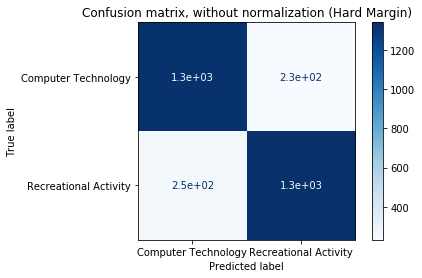

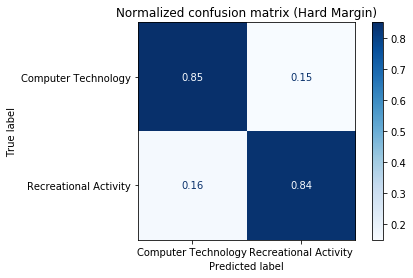

True Negatives:  1328
False Positives:  232
False Negatives:  250
True Positives:  1340

Accuracy	 84.70%
Precision	 85.24%
Recall		 84.28%
F1 Score	 84.76


In [18]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# print(test_dataset.target)

titles_options = [("Confusion matrix, without normalization (Hard Margin)", None),
                  ("Normalized confusion matrix (Hard Margin)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(hardMargin, X_test_reduced, test_dataset.target,
                                 display_labels=["Computer Technology", "Recreational Activity"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

tn, fp, fn, tp = confusion_matrix(test_dataset.target, hardPredict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("\nAccuracy\t {:0.2f}%".format(Accuracy))

Precision = tp/(tp+fp)*100
print("Precision\t {:0.2f}%".format(Precision))

#Recall 
Recall = tp/(tp+fn)*100
print("Recall\t\t {:0.2f}%".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score\t {:0.2f}".format(f1))

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


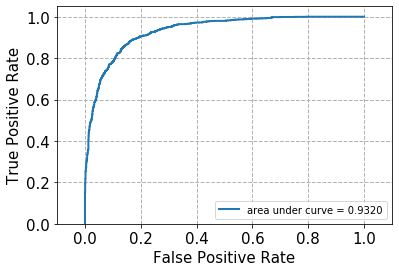

In [252]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# hardMargin = LinearSVC(loss='hinge',C=1000).fit(X_train_reduced, train_dataset.target)
pipelineHardMargin = Pipeline([
    ('clf', LinearSVC(loss='hinge',C=1000)),
])

fit_predict_and_plot_roc(pipelineHardMargin, X_train_reduced, train_dataset.target, X_test_reduced, test_dataset.target)

Confusion matrix, without normalization (Soft Margin)
[[ 308 1252]
 [   0 1590]]
Normalized confusion matrix (Soft Margin)
[[0.1974359 0.8025641]
 [0.        1.       ]]


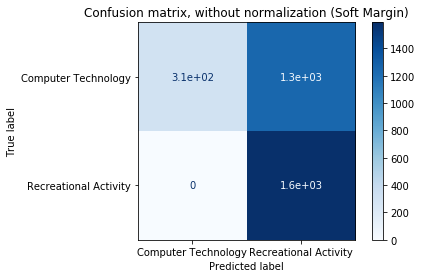

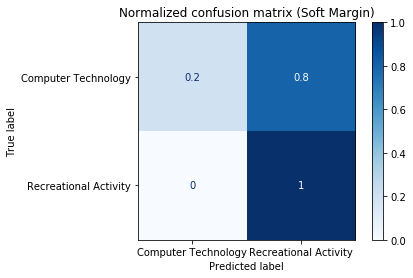

True Negatives:  308
False Positives:  1252
False Negatives:  0
True Positives:  1590

Accuracy	 60.25%
Precision	 55.95%
Recall		 100.00%
F1 Score	 71.75


In [253]:
titles_options = [("Confusion matrix, without normalization (Soft Margin)", None),
                  ("Normalized confusion matrix (Soft Margin)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(softMargin, X_test_reduced, test_dataset.target,
                                 display_labels=["Computer Technology", "Recreational Activity"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

tn, fp, fn, tp = confusion_matrix(test_dataset.target, softPredict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("\nAccuracy\t {:0.2f}%".format(Accuracy))

Precision = tp/(tp+fp)*100
print("Precision\t {:0.2f}%".format(Precision))

#Recall 
Recall = tp/(tp+fn)*100
print("Recall\t\t {:0.2f}%".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score\t {:0.2f}".format(f1))

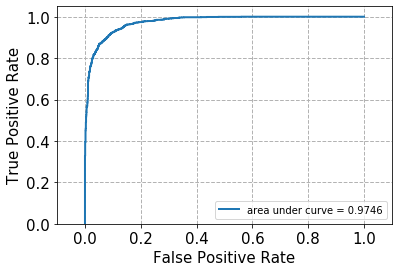

In [254]:
fpr, tpr, threshold = metrics.roc_curve(test_dataset.target, softPredict)
roc_auc = metrics.auc(fpr, tpr)

pipelineSoftMargin = Pipeline([
    ('clf', LinearSVC(loss='hinge',C=0.001)),
])

fit_predict_and_plot_roc(pipelineSoftMargin, X_train_reduced, train_dataset.target, X_test_reduced, test_dataset.target)

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('clf', LinearSVC(loss='hinge'))])

# We made a logspace C_OPTIONS array to search through the range 10^-3 to 10^3
C_OPTIONS = np.logspace(-3, 3, num=50, endpoint=True, base=10.0)

param_grid = [
    {
        'clf': [LinearSVC()],
        'clf__C': C_OPTIONS
    }
]
grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='balanced_accuracy')
grid.fit(X_train_reduced, train_dataset.target)

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='hinge', max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                                                  verbose=0))],
                                verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid=[{'clf': [LinearSVC(C=104.81131341546...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362

In [256]:
import pandas as pd

pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025358,0.008052,0.004831,0.000805,"LinearSVC(C=104.81131341546852, class_weight=N...",0.001,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.924488,0.915879,0.930734,0.924235,0.913807,0.921828,0.006196,50
1,0.020111,0.008370,0.004467,0.003653,"LinearSVC(C=104.81131341546852, class_weight=N...",0.00132571,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.929878,0.920163,0.936121,0.932804,0.926600,0.929113,0.005472,49
2,0.023005,0.003019,0.005023,0.002034,"LinearSVC(C=104.81131341546852, class_weight=N...",0.00175751,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.929919,0.929798,0.942531,0.939259,0.929834,0.934268,0.005509,48
3,0.010989,0.001435,0.002000,0.000084,"LinearSVC(C=104.81131341546852, class_weight=N...",0.00232995,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.929939,0.939393,0.945759,0.941418,0.935183,0.938338,0.005407,47
4,0.011142,0.001984,0.001996,0.000133,"LinearSVC(C=104.81131341546852, class_weight=N...",0.00308884,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.931005,0.941545,0.946827,0.942531,0.941579,0.940697,0.005223,46
5,0.011143,0.000676,0.001961,0.000069,"LinearSVC(C=104.81131341546852, class_weight=N...",0.00409492,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.935309,0.945810,0.946849,0.943622,0.943729,0.943064,0.004068,45
6,0.010732,0.000401,0.001986,0.000220,"LinearSVC(C=104.81131341546852, class_weight=N...",0.00542868,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.938508,0.946896,0.946849,0.947895,0.943747,0.944779,0.003431,44
7,0.016438,0.007396,0.003877,0.002756,"LinearSVC(C=104.81131341546852, class_weight=N...",0.00719686,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.941706,0.947962,0.948986,0.948986,0.945897,0.946707,0.002743,43
8,0.033067,0.004757,0.004517,0.001374,"LinearSVC(C=104.81131341546852, class_weight=N...",0.00954095,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.941706,0.949028,0.951123,0.949009,0.946963,0.947566,0.003212,42
9,0.024658,0.009934,0.005711,0.005002,"LinearSVC(C=104.81131341546852, class_weight=N...",0.0126486,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.940660,0.949028,0.954328,0.950077,0.948029,0.948424,0.004436,41


/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion matrix, without normalization (Better Margin)
[[1354  206]
 [ 265 1325]]
Normalized confusion matrix (Better Margin)
[[0.86794872 0.13205128]
 [0.16666667 0.83333333]]


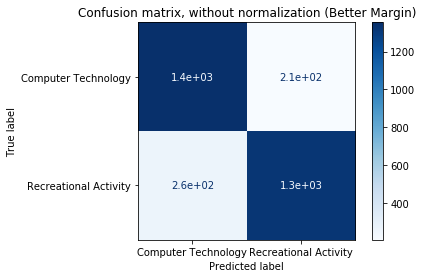

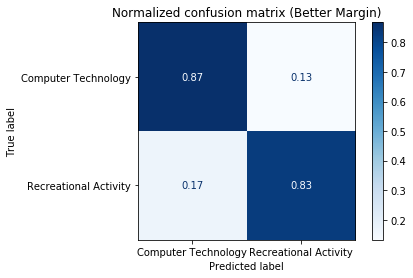

True Negatives:  1354
False Positives:  206
False Negatives:  265
True Positives:  1325

Accuracy	 85.05%
Precision	 86.54%
Recall		 83.33%
F1 Score	 84.91


In [263]:
betterMargin = LinearSVC(loss='hinge',C=104.81131341546852).fit(X_train_reduced, train_dataset.target)
betterPredict = betterMargin.predict(X_test_reduced)

titles_options = [("Confusion matrix, without normalization (Better Margin)", None),
                  ("Normalized confusion matrix (Better Margin)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(betterMargin, X_test_reduced, test_dataset.target,
                                 display_labels=["Computer Technology", "Recreational Activity"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

tn, fp, fn, tp = confusion_matrix(test_dataset.target, betterPredict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("\nAccuracy\t {:0.2f}%".format(Accuracy))

Precision = tp/(tp+fp)*100
print("Precision\t {:0.2f}%".format(Precision))

#Recall 
Recall = tp/(tp+fn)*100
print("Recall\t\t {:0.2f}%".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score\t {:0.2f}".format(f1))

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


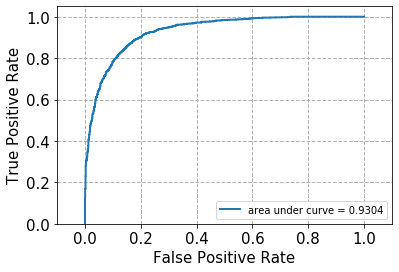

In [264]:
pipelineBetterMargin = Pipeline([
    ('clf', LinearSVC(loss='hinge',C=104.81131341546852)),
])

fit_predict_and_plot_roc(pipelineBetterMargin, X_train_reduced, train_dataset.target, X_test_reduced, test_dataset.target)

# Question 5

In [265]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Higher C value indicates less regularization
logReg = LogisticRegression(random_state=0, C=10000).fit(X_train_reduced, train_dataset.target)

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix, without normalization (Better Margin)
[[1352  208]
 [ 250 1340]]
Normalized confusion matrix (Better Margin)
[[0.86666667 0.13333333]
 [0.1572327  0.8427673 ]]


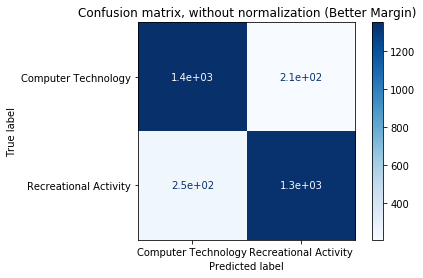

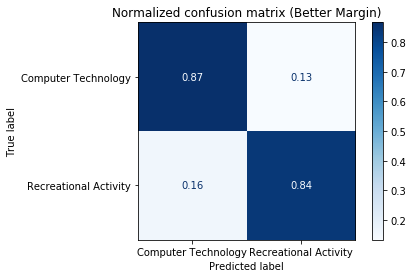

True Negatives:  1352
False Positives:  208
False Negatives:  250
True Positives:  1340

Accuracy	 85.46%
Precision	 86.56%
Recall		 84.28%
F1 Score	 85.40


In [266]:
logRegPredict = logReg.predict(X_test_reduced)

titles_options = [("Confusion matrix, without normalization (Better Margin)", None),
                  ("Normalized confusion matrix (Better Margin)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logReg, X_test_reduced, test_dataset.target,
                                 display_labels=["Computer Technology", "Recreational Activity"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

tn, fp, fn, tp = confusion_matrix(test_dataset.target, logRegPredict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("\nAccuracy\t {:0.2f}%".format(Accuracy))

Precision = tp/(tp+fp)*100
print("Precision\t {:0.2f}%".format(Precision))

#Recall 
Recall = tp/(tp+fn)*100
print("Recall\t\t {:0.2f}%".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score\t {:0.2f}".format(f1))

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


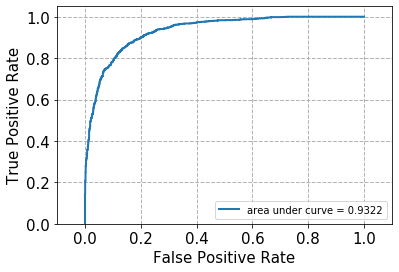

In [267]:
# logReg = LogisticRegression(random_state=0, C=10000).fit(X_train_reduced, train_dataset.target)
pipelineLogReg = Pipeline([
    ('clf', LogisticRegression(random_state=0, C=10000)),
])

fit_predict_and_plot_roc(pipelineLogReg, X_train_reduced, train_dataset.target, X_test_reduced, test_dataset.target)

In [268]:
# logReg = LogisticRegression(random_state=0, C=10000).fit(X_train_reduced, train_dataset.target)
pipeline = Pipeline([
    ('clf', LogisticRegression(random_state=0, solver = 'liblinear'))])

# We made a logspace C_OPTIONS array to search through the range 10^-3 to 10^3
C_OPTIONS = np.logspace(-3, 3, num=50, endpoint=True, base=10.0)
PENALTY_OPTIONS = ['l1', 'l2']

param_grid = [
    {
        'clf': [(LogisticRegression(random_state=0, solver = 'liblinear'))],
        'clf__C': C_OPTIONS,
        'clf__penalty': PENALTY_OPTIONS
    }
]
grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='balanced_accuracy')
grid.fit(X_train_reduced, train_dataset.target)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=0,
                                                    

In [269]:
df = pd.DataFrame(grid.cv_results_)
pd.set_option('display.max_rows', df.shape[0]+1)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011476,0.001934,0.003108,0.000361,"LogisticRegression(C=184.20699693267164, class...",0.001,l1,{'clf': LogisticRegression(C=184.2069969326716...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,93
1,0.012577,0.002928,0.002781,0.001667,"LogisticRegression(C=184.20699693267164, class...",0.001,l2,{'clf': LogisticRegression(C=184.2069969326716...,0.785714,0.752665,0.781005,0.780983,0.747335,0.769540,0.016136,92
2,0.006685,0.000098,0.001816,0.000043,"LogisticRegression(C=184.20699693267164, class...",0.00132571,l1,{'clf': LogisticRegression(C=184.2069969326716...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,93
3,0.009412,0.000090,0.001805,0.000009,"LogisticRegression(C=184.20699693267164, class...",0.00132571,l2,{'clf': LogisticRegression(C=184.2069969326716...,0.803838,0.783582,0.815193,0.808761,0.781486,0.798572,0.013597,91
4,0.007080,0.000337,0.001909,0.000063,"LogisticRegression(C=184.20699693267164, class...",0.00175751,l1,{'clf': LogisticRegression(C=184.2069969326716...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,93
5,0.009529,0.000088,0.001829,0.000032,"LogisticRegression(C=184.20699693267164, class...",0.00175751,l2,{'clf': LogisticRegression(C=184.2069969326716...,0.820916,0.815565,0.843016,0.836538,0.811336,0.825474,0.012239,90
6,0.006744,0.000145,0.001857,0.000052,"LogisticRegression(C=184.20699693267164, class...",0.00232995,l1,{'clf': LogisticRegression(C=184.2069969326716...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,93
7,0.011172,0.000087,0.001849,0.000043,"LogisticRegression(C=184.20699693267164, class...",0.00232995,l2,{'clf': LogisticRegression(C=184.2069969326716...,0.861427,0.845436,0.858040,0.867521,0.847584,0.856002,0.008352,89
8,0.006729,0.000119,0.001853,0.000042,"LogisticRegression(C=184.20699693267164, class...",0.00308884,l1,{'clf': LogisticRegression(C=184.2069969326716...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,93
9,0.013924,0.002871,0.002527,0.000646,"LogisticRegression(C=184.20699693267164, class...",0.00308884,l2,{'clf': LogisticRegression(C=184.2069969326716...,0.875307,0.867884,0.881544,0.884638,0.871056,0.876086,0.006263,88


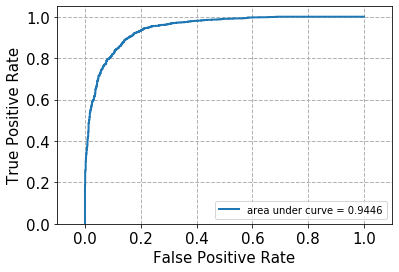

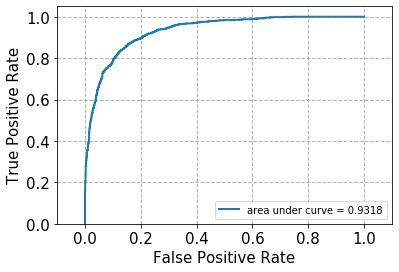

In [270]:
pipelineLogReg = Pipeline([
    ('clf', LogisticRegression(random_state=0, C=184.207, solver = 'liblinear', penalty = 'l2')),
])


fit_predict_and_plot_roc(pipelineLogReg, X_train_reduced, train_dataset.target, X_test_reduced, test_dataset.target)
#frame1 = plt.gca()
#label('Logistic Regression, L2 Regularization with C = 754.312')

pipelineLogReg = Pipeline([
    ('clf', LogisticRegression(random_state=0, C=323.746, solver = 'liblinear', penalty = 'l1')),
])

fit_predict_and_plot_roc(pipelineLogReg, X_train_reduced, train_dataset.target, X_test_reduced, test_dataset.target)
#frame1 = plot.gca()
#plt.label('Logistic Regression, L1 Regularization with C = 6.25055')


Confusion matrix, without normalization (L2 Regularization, C = 184.21)
[[1373  187]
 [ 238 1352]]
Normalized confusion matrix (L2 Regularization, C = 184.21)
[[0.88012821 0.11987179]
 [0.14968553 0.85031447]]


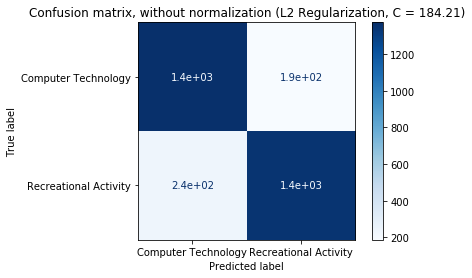

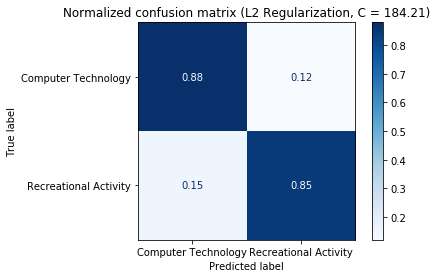

True Negatives:  1373
False Positives:  187
False Negatives:  238
True Positives:  1352

Accuracy	 86.51%
Precision	 87.85%
Recall		 85.03%
F1 Score	 86.42


In [271]:
logRegL2 = LogisticRegression(random_state=0, C=184.207, solver = 'liblinear', penalty = 'l2').fit(X_train_reduced, train_dataset.target)
logRegPredictL2 = logRegL2.predict(X_test_reduced)

titles_options = [("Confusion matrix, without normalization (L2 Regularization, C = 184.21)", None),
                  ("Normalized confusion matrix (L2 Regularization, C = 184.21)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logRegL2, X_test_reduced, test_dataset.target,
                                 display_labels=["Computer Technology", "Recreational Activity"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

tn, fp, fn, tp = confusion_matrix(test_dataset.target, logRegPredictL2).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("\nAccuracy\t {:0.2f}%".format(Accuracy))

Precision = tp/(tp+fp)*100
print("Precision\t {:0.2f}%".format(Precision))

#Recall 
Recall = tp/(tp+fn)*100
print("Recall\t\t {:0.2f}%".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score\t {:0.2f}".format(f1))

Confusion matrix, without normalization (L1 Regularization, C = 323.746)
[[1348  212]
 [ 249 1341]]
Normalized confusion matrix (L1 Regularization, C = 323.746)
[[0.86410256 0.13589744]
 [0.15660377 0.84339623]]


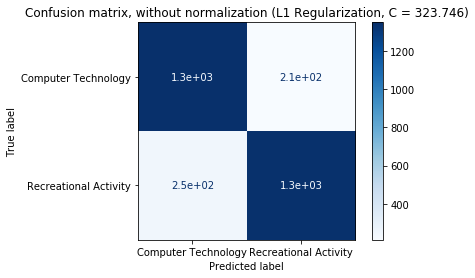

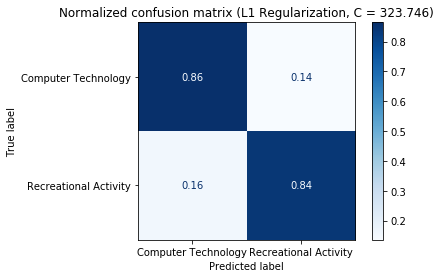

True Negatives:  1348
False Positives:  212
False Negatives:  249
True Positives:  1341

Accuracy	 85.37%
Precision	 86.35%
Recall		 84.34%
F1 Score	 85.33


In [272]:
logRegL1 = LogisticRegression(random_state=0, C=323.746, solver = 'liblinear', penalty = 'l1').fit(X_train_reduced, train_dataset.target)
logRegPredictL1 = logRegL1.predict(X_test_reduced)

titles_options = [("Confusion matrix, without normalization (L1 Regularization, C = 323.746)", None),
                  ("Normalized confusion matrix (L1 Regularization, C = 323.746)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logRegL1, X_test_reduced, test_dataset.target,
                                 display_labels=["Computer Technology", "Recreational Activity"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

tn, fp, fn, tp = confusion_matrix(test_dataset.target, logRegPredictL1).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("\nAccuracy\t {:0.2f}%".format(Accuracy))

Precision = tp/(tp+fp)*100
print("Precision\t {:0.2f}%".format(Precision))

#Recall 
Recall = tp/(tp+fn)*100
print("Recall\t\t {:0.2f}%".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score\t {:0.2f}".format(f1))

# Question 6

In [273]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

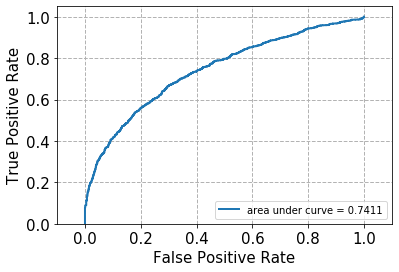

In [274]:
pipelineGaussianNB = Pipeline([
    ('clf', GaussianNB()),
])

fit_predict_and_plot_roc(pipelineGaussianNB, X_train_reduced, train_dataset.target, X_test_reduced, test_dataset.target)

Confusion matrix, without normalization
[[1294  266]
 [ 764  826]]
Normalized confusion matrix
[[0.82948718 0.17051282]
 [0.48050314 0.51949686]]


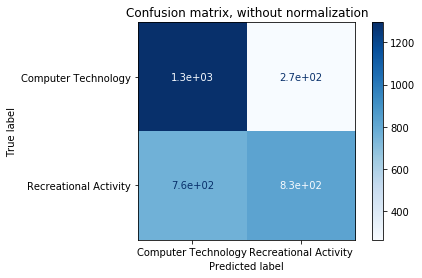

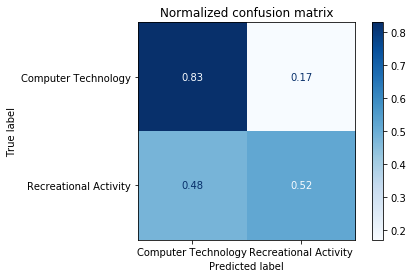

True Negatives:  1294
False Positives:  266
False Negatives:  764
True Positives:  826

Accuracy	 67.30%
Precision	 75.64%
Recall		 51.95%
F1 Score	 61.60


In [275]:
gNBModel = GaussianNB().fit(X_train_reduced, train_dataset.target)
gNBPredict = gNBModel.predict(X_test_reduced)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gNBModel, X_test_reduced, test_dataset.target,
                                 display_labels=["Computer Technology", "Recreational Activity"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

tn, fp, fn, tp = confusion_matrix(test_dataset.target, gNBPredict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("\nAccuracy\t {:0.2f}%".format(Accuracy))

Precision = tp/(tp+fp)*100
print("Precision\t {:0.2f}%".format(Precision))

#Recall 
Recall = tp/(tp+fn)*100
print("Recall\t\t {:0.2f}%".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score\t {:0.2f}".format(f1))

# Question 7

### Pipeline features:

Loading Data:              remove “headers” and “footers” vs not

Feature Extraction:        mindf = 3vs5
                            use lemmatization vs not
                            
Dimensionality:            LSI vs NMF

Classifier:                
                           SVM with the best γ previously found

,                           Logistic Regression: L1 regularization vs L2 regularization, with the best regularization strength previously found
                           
,                          GaussianNB



In [276]:
from sklearn.feature_extraction.text import TfidfTransformer

datasetWHF = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None, 
                                remove = ('headers', 'footers'))
datasetWOHF = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)

pipelineGrid = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('dim_red', TruncatedSVD(n_components=50, random_state=0)),
    ('clf', LinearSVC(loss='hinge',C=104.81131341546852))])


def stem_rmv_punc_noLem(doc):
    return (word for word in doc if word not in combined_stopwords and not word.isdigit())

param_grid = [
    {
        'vect__min_df': [3, 5],
        'vect__analyzer': [stem_rmv_punc, stem_rmv_punc_noLem],
        'dim_red': [TruncatedSVD(n_components=50, random_state=0), NMF(n_components=50, random_state=0)],
        'clf': [LinearSVC(loss='hinge',C=104.81131341546852)]
    },
    {
        'vect__min_df': [3, 5],
        'vect__analyzer': [stem_rmv_punc, stem_rmv_punc_noLem],
        'dim_red': [TruncatedSVD(n_components=50, random_state=0), NMF(n_components=50, random_state=0)],
        'clf': [LogisticRegression(random_state=0, C=184.207, solver = 'liblinear', penalty = 'l2')]
    },
    {
        'vect__min_df': [3, 5],
        'vect__analyzer': [stem_rmv_punc, stem_rmv_punc_noLem],
        'dim_red': [TruncatedSVD(n_components=50, random_state=0), NMF(n_components=50, random_state=0)],
        'clf': [GaussianNB()]
    },
]
gridWHF = GridSearchCV(pipelineGrid, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
gridWHF.fit(datasetWHF.data, datasetWHF.target)

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [277]:
gridWOHF = GridSearchCV(pipelineGrid, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
gridWOHF.fit(datasetWOHF.data, datasetWOHF.target)

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MichaelK./.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The scor

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [278]:
df = pd.DataFrame(gridWHF.cv_results_)
pd.set_option('display.max_rows', df.shape[0]+1)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_dim_red,param_vect__analyzer,param_vect__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,56.965765,5.953148,14.127331,2.635728,"LinearSVC(C=104.81131341546852, class_weight=N...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x1aa118b830>,3,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.793031,0.853221,0.809725,0.844609,0.820296,0.824176,0.022159,1
1,51.517780,0.969031,12.535895,0.937356,"LinearSVC(C=104.81131341546852, class_weight=N...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x1aa118b830>,5,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.799366,0.846885,0.805497,0.847780,0.816068,0.823119,0.020481,4
2,1.197183,0.019227,0.000000,0.000000,"LinearSVC(C=104.81131341546852, class_weight=N...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc_noLem at 0x1a7bb1e4d0>,3,"{'clf': LinearSVC(C=104.81131341546852, class_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
3,1.200886,0.019393,0.000000,0.000000,"LinearSVC(C=104.81131341546852, class_weight=N...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc_noLem at 0x1a7bb1e4d0>,5,"{'clf': LinearSVC(C=104.81131341546852, class_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
4,63.796767,3.572784,12.654442,0.891016,"LinearSVC(C=104.81131341546852, class_weight=N...","NMF(alpha=0.0, beta_loss='frobenius', init=Non...",<function stem_rmv_punc at 0x1aa118b830>,3,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.767687,0.814150,0.776956,0.784355,0.768499,0.782329,0.017036,6
5,59.168935,2.486601,12.646814,0.938760,"LinearSVC(C=104.81131341546852, class_weight=N...","NMF(alpha=0.0, beta_loss='frobenius', init=Non...",<function stem_rmv_punc at 0x1aa118b830>,5,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.762408,0.799366,0.762156,0.794926,0.764271,0.776625,0.016830,8
6,7.870409,0.086406,0.752488,0.097595,"LinearSVC(C=104.81131341546852, class_weight=N...","NMF(alpha=0.0, beta_loss='frobenius', init=Non...",<function stem_rmv_punc_noLem at 0x1a7bb1e4d0>,3,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.286167,0.214361,0.269556,0.227273,0.323467,0.264165,0.039677,16
7,8.051944,0.151939,0.801625,0.118762,"LinearSVC(C=104.81131341546852, class_weight=N...","NMF(alpha=0.0, beta_loss='frobenius', init=Non...",<function stem_rmv_punc_noLem at 0x1a7bb1e4d0>,5,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.285111,0.277719,0.318182,0.286469,0.197674,0.273031,0.040164,15
8,51.139030,1.027252,12.565828,1.053024,"LogisticRegression(C=184.207, class_weight=Non...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x1aa118b830>,3,"{'clf': LogisticRegression(C=184.207, class_we...",0.804646,0.855333,0.800211,0.841438,0.819239,0.824173,0.021207,2
9,50.902572,1.013045,12.503913,0.947517,"LogisticRegression(C=184.207, class_weight=Non...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x1aa118b830>,5,"{'clf': LogisticRegression(C=184.207, class_we...",0.810982,0.844773,0.806554,0.840381,0.813953,0.823329,0.015952,3


In [279]:
df = pd.DataFrame(gridWOHF.cv_results_)
pd.set_option('display.max_rows', df.shape[0]+1)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_dim_red,param_vect__analyzer,param_vect__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,37.870359,1.437494,9.439243,1.372477,"LinearSVC(C=104.81131341546852, class_weight=N...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x1aa118b830>,3,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.877778,0.857143,0.868254,0.865079,0.852381,0.864127,0.008843,3
1,37.323373,1.161959,9.177850,1.052339,"LinearSVC(C=104.81131341546852, class_weight=N...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x1aa118b830>,5,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.865079,0.869841,0.861905,0.868254,0.850794,0.863175,0.006764,4
2,2.181323,0.998570,0.154735,0.128176,"LinearSVC(C=104.81131341546852, class_weight=N...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc_noLem at 0x1a7bb1e4d0>,3,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.342857,0.353968,NaN,NaN,0.298413,NaN,NaN,23
3,0.951638,0.021806,0.000000,0.000000,"LinearSVC(C=104.81131341546852, class_weight=N...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc_noLem at 0x1a7bb1e4d0>,5,"{'clf': LinearSVC(C=104.81131341546852, class_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
4,48.813786,3.370637,9.603289,0.964280,"LinearSVC(C=104.81131341546852, class_weight=N...","NMF(alpha=0.0, beta_loss='frobenius', init=Non...",<function stem_rmv_punc at 0x1aa118b830>,3,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.820635,0.784127,0.806349,0.798413,0.820635,0.806032,0.013889,7
5,44.808217,2.063585,9.252345,1.038670,"LinearSVC(C=104.81131341546852, class_weight=N...","NMF(alpha=0.0, beta_loss='frobenius', init=Non...",<function stem_rmv_punc at 0x1aa118b830>,5,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.838095,0.795238,0.812698,0.803175,0.812698,0.812381,0.014423,5
6,5.106104,0.184867,0.574657,0.127178,"LinearSVC(C=104.81131341546852, class_weight=N...","NMF(alpha=0.0, beta_loss='frobenius', init=Non...",<function stem_rmv_punc_noLem at 0x1a7bb1e4d0>,3,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.374603,0.361905,0.298413,0.355556,0.365079,0.351111,0.027057,15
7,5.206656,0.065046,0.699825,0.029131,"LinearSVC(C=104.81131341546852, class_weight=N...","NMF(alpha=0.0, beta_loss='frobenius', init=Non...",<function stem_rmv_punc_noLem at 0x1a7bb1e4d0>,5,"{'clf': LinearSVC(C=104.81131341546852, class_...",0.338095,0.361905,0.341270,0.323810,0.326984,0.338413,0.013446,16
8,37.171165,1.088269,9.117200,1.043364,"LogisticRegression(C=184.207, class_weight=Non...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x1aa118b830>,3,"{'clf': LogisticRegression(C=184.207, class_we...",0.876190,0.868254,0.865079,0.865079,0.855556,0.866032,0.006629,2
9,37.732707,2.202339,9.168086,0.995019,"LogisticRegression(C=184.207, class_weight=Non...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x1aa118b830>,5,"{'clf': LogisticRegression(C=184.207, class_we...",0.871429,0.880952,0.869841,0.863492,0.855556,0.868254,0.008459,1
